In [122]:
import glob
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
%matplotlib inline
from matplotlib.font_manager import FontProperties
from plotnine import *

In [123]:
names = glob.glob("/home/roi/GD_SG/results/exp_convergence/*")

In [124]:
names

['/home/roi/GD_SG/results/exp_convergence/convergence16.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence15.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence7.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence4.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence14.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence9.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence10.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence12.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence11.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence18.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence2.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence6.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence17.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence8.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence5.csv',
 '/home/roi/GD_SG/results/exp_convergence/convergence0.csv',
 '/home/roi/GD_S

In [125]:
for i in range(len(names)):
    #
    if i == 0:
        #
        final = pd.read_csv(names[i])
        mean = re.findall("\d+", names[i])
        final["Experiment"] = float(mean[0])
        #
    else:
        #
        curr = pd.read_csv(names[i])
        mean = re.findall("\d+", names[i])
        curr["Experiment"] = float(mean[0])
        final = pd.concat([final,curr])
        
all_means = list(set(final["Experiment"]))
all_means.sort()

In [126]:
final.to_csv("convergence.csv")

In [119]:
final_red = final[final.Experiment > 10]
for i in set(final_red.Experiment):
    final_red.Experiment[final_red.Experiment == i] = str(int(i))

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/roi/.local/lib/python3.6/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


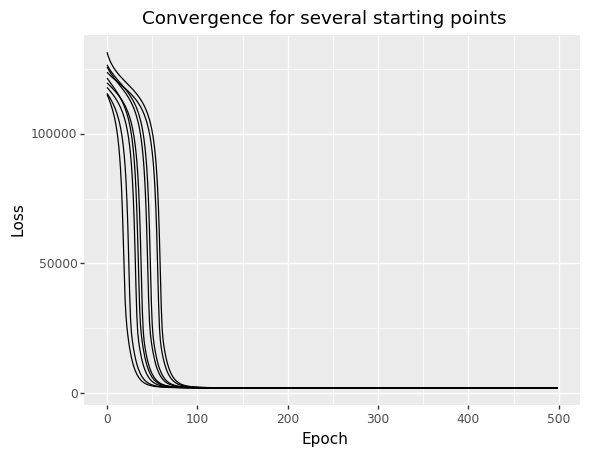

<ggplot: (8793606056140)>

In [111]:
final_red["Log-Epoch"] = np.log(final_red["Epoch"])
p = ggplot(final_red) + geom_line(aes(x= "Epoch", y = "Loss", fill = "Experiment" ))
p = p + guides(color=False) + ggtitle("Convergence for several starting points")
p 

In [114]:
ggsave(p, file="../figs/convergence.eps", device="eps")

/home/roi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/roi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: plotnine-save-8793606056140.pdf
  warn('Filename: {}'.format(filename))
